In [1]:
from __future__ import print_function

from io import BytesIO
import time

import cv2
import PIL.Image
import IPython
from IPython.display import clear_output

In [2]:
class WebcamIssueException(Exception):
    pass


def capture_webcam_as_array(video_capture):
    success, frame = video_capture.read()
    print("Valid VideoCapture?", success)
    if not success:
        raise WebcamIssueException
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame


In [3]:
def show_array(a, fmt='jpeg'):
    with BytesIO() as f:
        image = PIL.Image.fromarray(a)
        image.save(f, fmt)
        clear_output(wait=True)
        IPython.display.display(
            IPython.display.Image(data=f.getvalue()))


In [4]:
def show_webcam(video_capture):
    t1 = time.time()
    frame = capture_webcam_as_array(video_capture)
    show_array(frame)
    t2 = time.time()
    print("%f FPS" % (1/(t2-t1)))


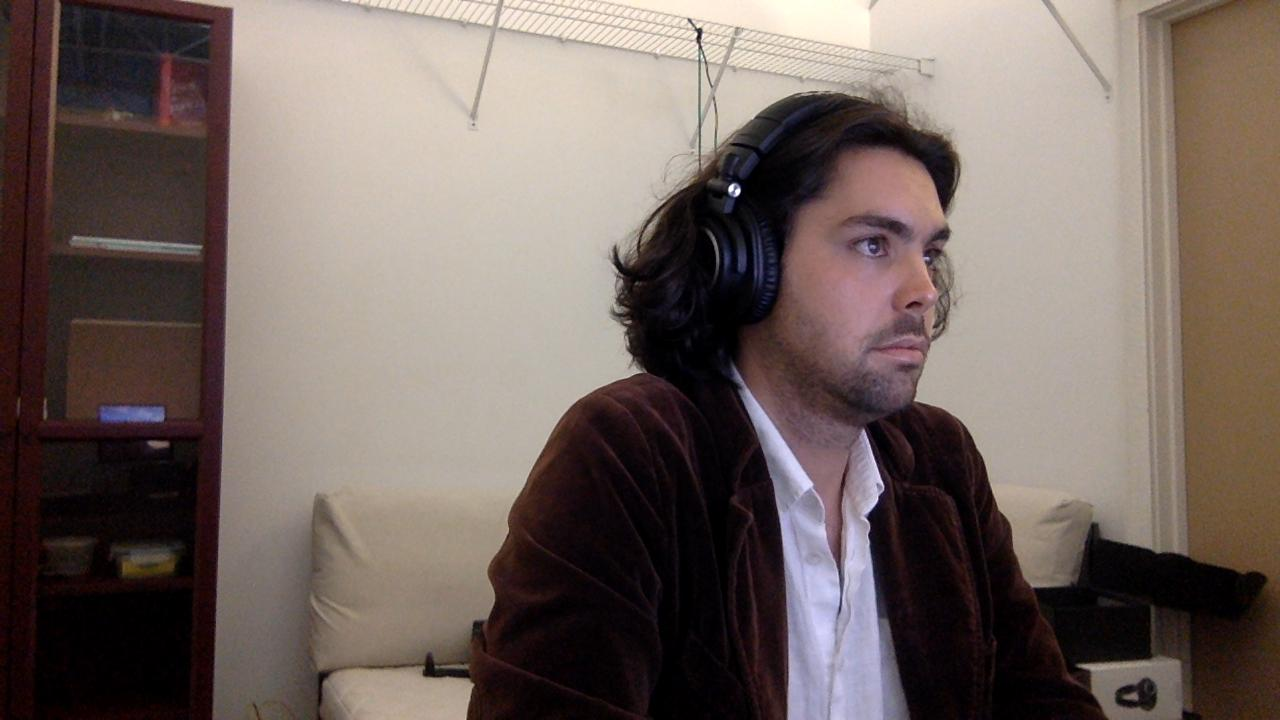

10.101937 FPS
Stream stopped


In [6]:
video_capture = cv2.VideoCapture(0)


while True:
    try:
        try:
            show_webcam(video_capture)
        except WebcamIssueException:
            continue
    except KeyboardInterrupt:
        video_capture.release()
        print("Stream stopped")
        break